In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scipy
import anndata as ad
import os
sc.settings.verbosity = 3
sc.logging.print_header()
sc.set_figure_params(dpi=100, dpi_save=600)

/home/yqcj/miniconda3/envs/scrublet/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/yqcj/miniconda3/envs/scrublet/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/yqcj/miniconda3/envs/scrublet/lib/python3.9/site-packages/umap/d

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.21.6 scipy==1.11.1 pandas==1.3.5 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.5 louvain==0.8.1 pynndescent==0.5.10


In [2]:
folder_path = "/mnt/g/YS-Stromal"

# 获取所有待处理的文件夹名称 (以COL开头的文件夹名)
col_folders = ['S-1',
 'S-2',
 'S-3',
 'S-5',
 'S-6',
 'S-7',
 'S-8',
 'S-9',
 'S-10',
 'S-11',
 'S-12',
 'S-13',
 'S-14',
 'COL07',
 'COL12',
 'COL16',              
 'SMC18T',
 'SMC19T',
 'SMC21T',
 'SMC22T',
 'SMC23T',
 'SMC25T']

adata_list = []
for col_folder in col_folders:
    h5ad_path = os.path.join(folder_path, col_folder,col_folder+"_SoupX_Scrublet.h5ad")
    adata = sc.read_h5ad(h5ad_path)
    adata_list.append(adata)
# 合并所有的 adata 对象

In [3]:
adata_list

[AnnData object with n_obs × n_vars = 13776 × 36601
     obs: 'predicted_doublets'
     var: 'gene_ids',
 AnnData object with n_obs × n_vars = 15935 × 36601
     obs: 'predicted_doublets'
     var: 'gene_ids',
 AnnData object with n_obs × n_vars = 5634 × 36601
     obs: 'predicted_doublets'
     var: 'gene_ids',
 AnnData object with n_obs × n_vars = 14047 × 36601
     obs: 'predicted_doublets'
     var: 'gene_ids',
 AnnData object with n_obs × n_vars = 11857 × 36601
     obs: 'predicted_doublets'
     var: 'gene_ids',
 AnnData object with n_obs × n_vars = 5608 × 36601
     obs: 'predicted_doublets'
     var: 'gene_ids',
 AnnData object with n_obs × n_vars = 12827 × 36601
     obs: 'predicted_doublets'
     var: 'gene_ids',
 AnnData object with n_obs × n_vars = 9767 × 36601
     obs: 'predicted_doublets'
     var: 'gene_ids',
 AnnData object with n_obs × n_vars = 9568 × 36601
     obs: 'predicted_doublets'
     var: 'gene_ids',
 AnnData object with n_obs × n_vars = 8080 × 36601
     obs

In [4]:
adata= adata_list[0].concatenate(adata_list[1:],batch_categories= ['S-1',
 'S-2',
 'S-3',
 'S-5',
 'S-6',
 'S-7',
 'S-8',
 'S-9',
 'S-10',
 'S-11',
 'S-12',
 'S-13',
 'S-14',
 'COL07',
 'COL12',
 'COL16',              
 'SMC18T',
 'SMC19T',
 'SMC21T',
 'SMC22T',
 'SMC23T',
 'SMC25T'])

/home/yqcj/miniconda3/envs/scrublet/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [5]:
adata.obs

predicted_doublets   batch
AAACCTGAGAAGAAGC-1-S-1                  False     S-1
AAACCTGAGCCGTCGT-1-S-1                  False     S-1
AAACCTGAGCTTCGCG-1-S-1                  False     S-1
AAACCTGAGGGTATCG-1-S-1                  False     S-1
AAACCTGAGGGTGTTG-1-S-1                  False     S-1
...                                       ...     ...
TTTGTCAAGCGCTCCA-1-SMC25T               False  SMC25T
TTTGTCAAGCGTTCCG-1-SMC25T               False  SMC25T
TTTGTCAAGTTCGATC-1-SMC25T               False  SMC25T
TTTGTCACAAATACAG-1-SMC25T               False  SMC25T
TTTGTCATCCCAAGTA-1-SMC25T               False  SMC25T

[190763 rows x 2 columns]

In [6]:
adata.write('YS_All_raw.h5ad',compression='gzip')

normalizing counts per cell
    finished (0:00:19)


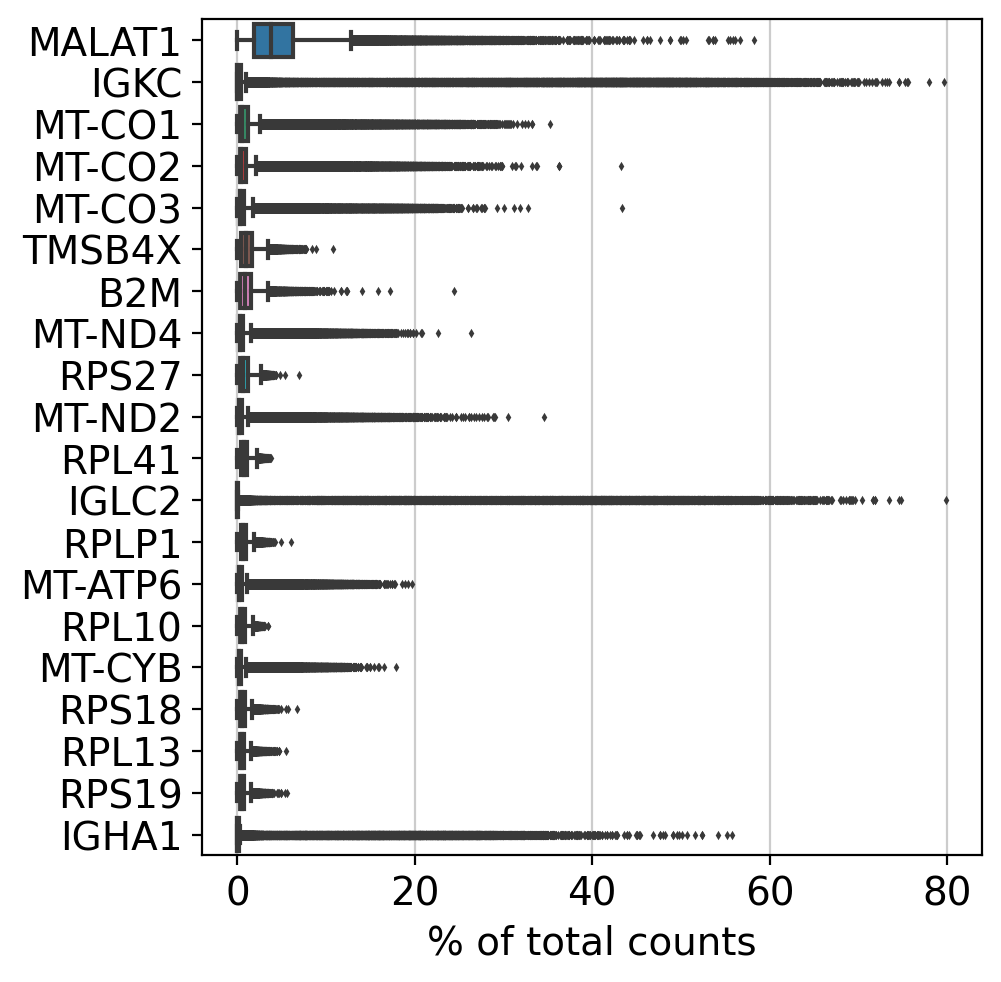

filtered out 4096 cells that have less than 200 genes expressed
filtered out 8799 genes that are detected in less than 25 cells


In [7]:
sc.pl.highest_expr_genes(adata, n_top=20)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=25)

In [8]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
adata.var['rp'] = adata.var_names.str.startswith('RPL') | adata.var_names.str.startswith('RPS')
adata

AnnData object with n_obs × n_vars = 186667 × 27802
    obs: 'predicted_doublets', 'batch', 'n_genes'
    var: 'gene_ids', 'n_cells', 'mt', 'rp'

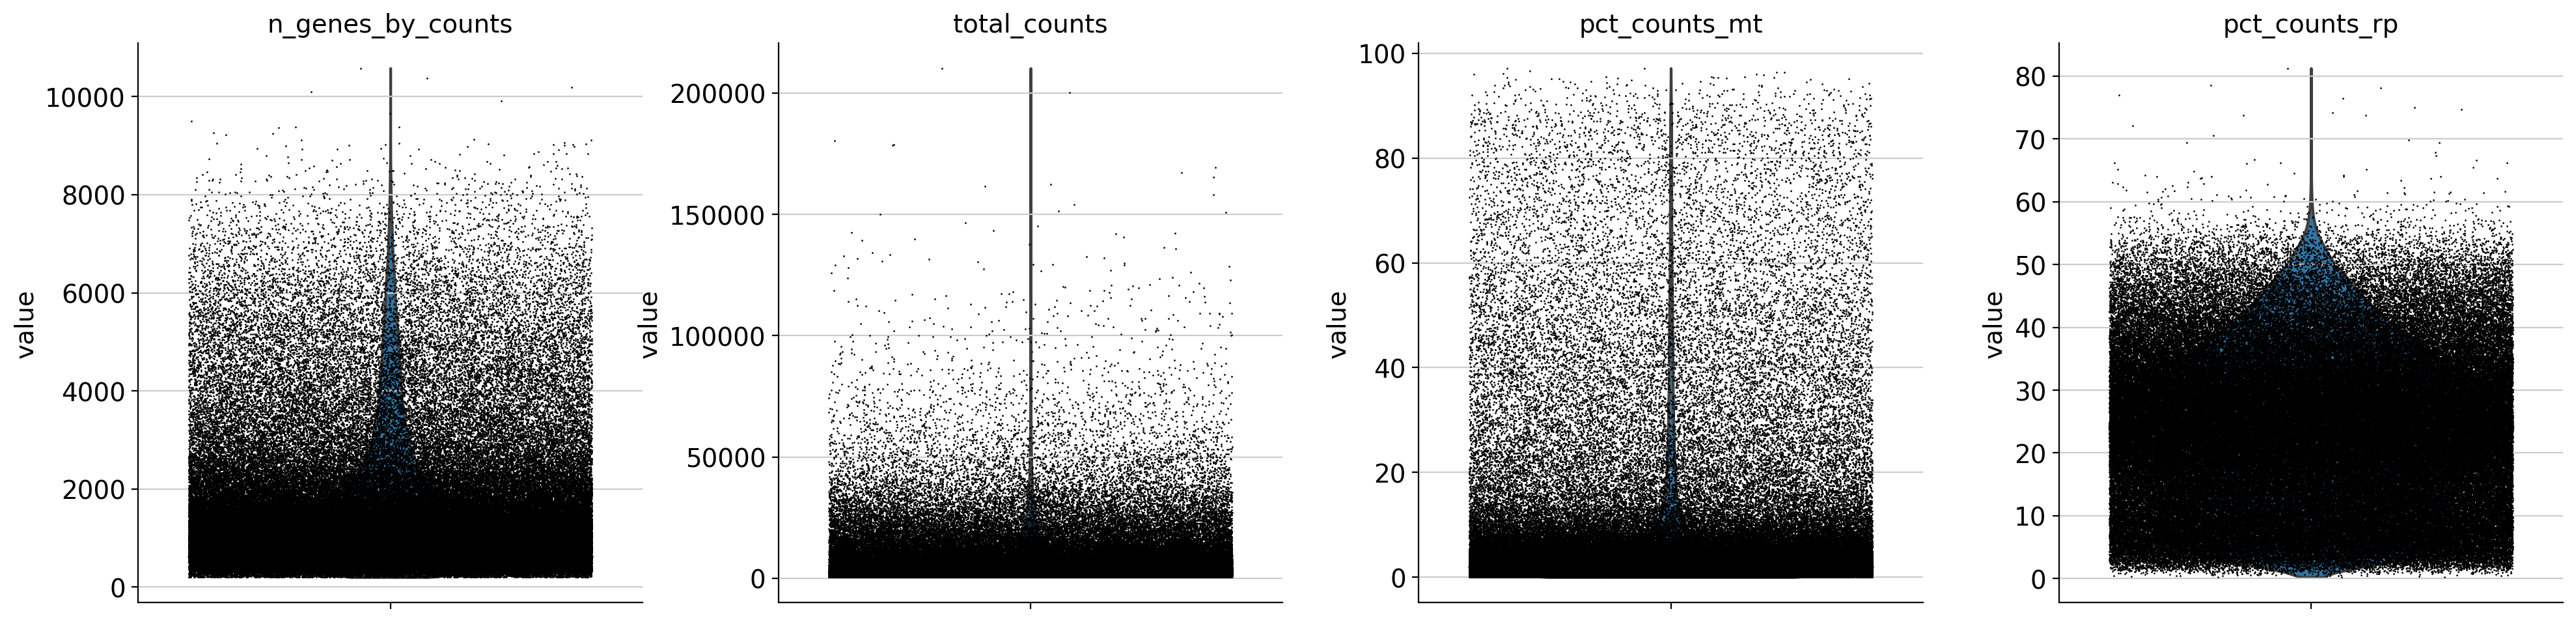

AnnData object with n_obs × n_vars = 186667 × 27802
    obs: 'predicted_doublets', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'pct_counts_rp'
    var: 'gene_ids', 'n_cells', 'mt', 'rp', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [9]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','rp'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_rp'], jitter=0.4, multi_panel=True,save='1.pdf')
adata

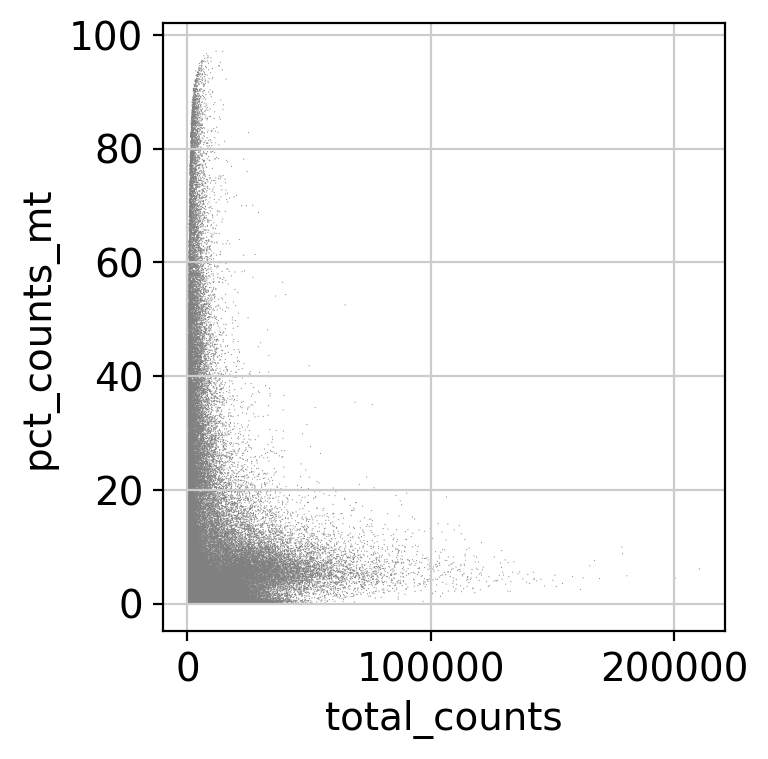

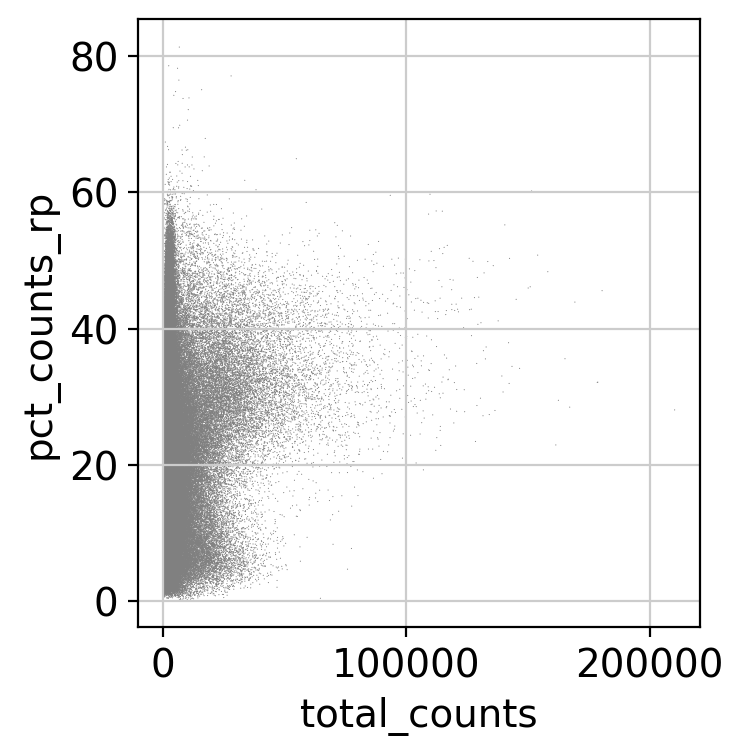

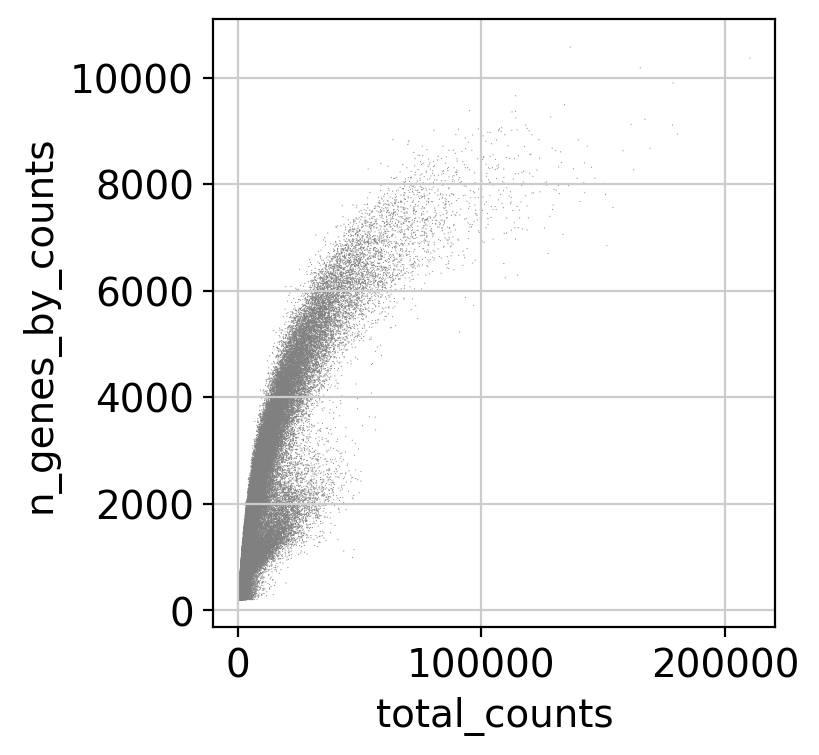

In [10]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_rp')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [11]:
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]
adata = adata[adata.obs.pct_counts_rp < 50, :]
adata

View of AnnData object with n_obs × n_vars = 166180 × 27802
    obs: 'predicted_doublets', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'pct_counts_rp'
    var: 'gene_ids', 'n_cells', 'mt', 'rp', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [12]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata

/home/yqcj/miniconda3/envs/scrublet/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:05)


AnnData object with n_obs × n_vars = 166180 × 27802
    obs: 'predicted_doublets', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'pct_counts_rp'
    var: 'gene_ids', 'n_cells', 'mt', 'rp', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:15)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


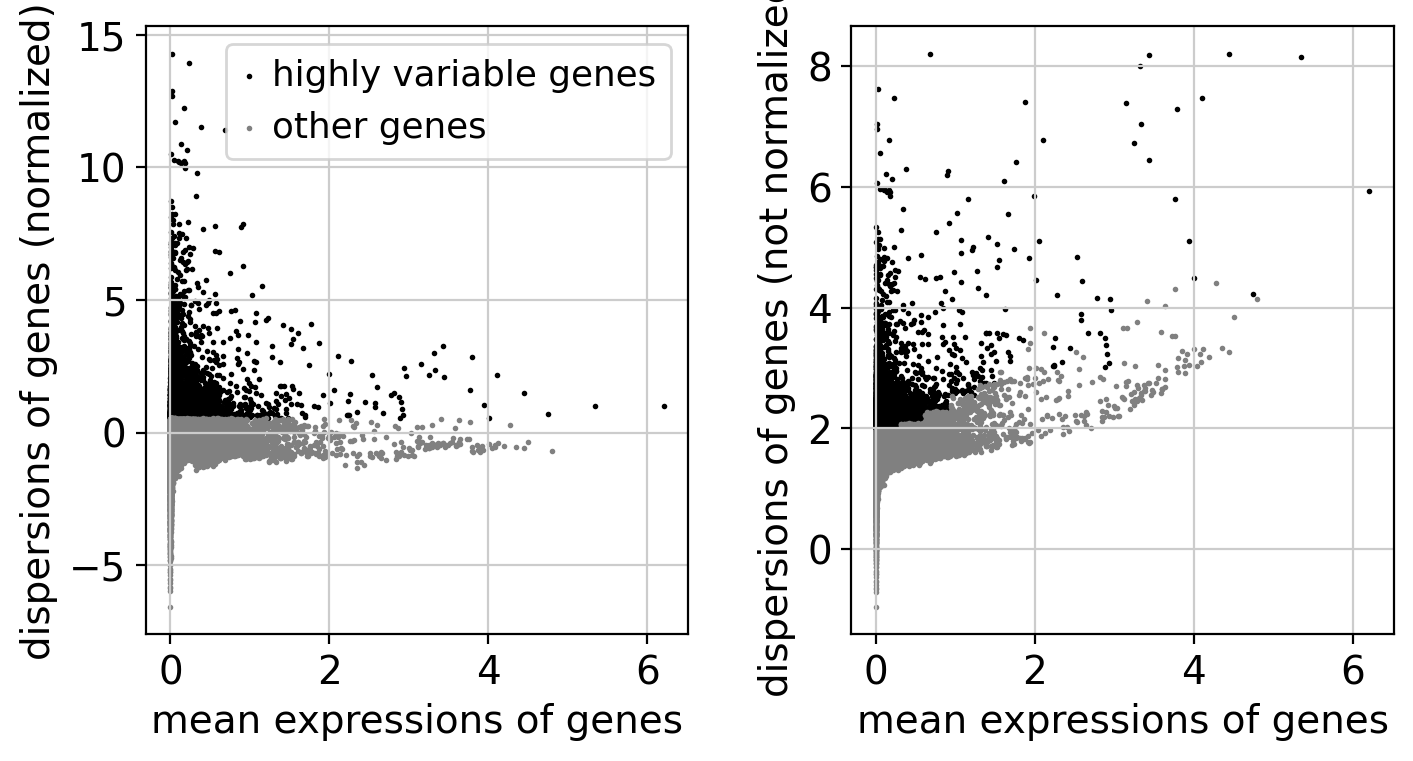

5000


AnnData object with n_obs × n_vars = 166180 × 27802
    obs: 'predicted_doublets', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'pct_counts_rp'
    var: 'gene_ids', 'n_cells', 'mt', 'rp', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [13]:
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
sc.pl.highly_variable_genes(adata)
print(sum(adata.var.highly_variable))
adata

In [14]:
adata.raw=adata

In [15]:
adata.raw

In [16]:
adata

AnnData object with n_obs × n_vars = 166180 × 27802
    obs: 'predicted_doublets', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'pct_counts_rp'
    var: 'gene_ids', 'n_cells', 'mt', 'rp', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [17]:
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 166180 × 5000
    obs: 'predicted_doublets', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'pct_counts_rp'
    var: 'gene_ids', 'n_cells', 'mt', 'rp', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [18]:
sc.pp.regress_out(adata, keys=['total_counts', 'pct_counts_mt','pct_counts_rp'], n_jobs=16)
sc.pp.scale(adata, max_value=10)
adata

regressing out ['total_counts', 'pct_counts_mt', 'pct_counts_rp']
    sparse input is densified and may lead to high memory use


/home/yqcj/miniconda3/envs/scrublet/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


    finished (0:07:52)


AnnData object with n_obs × n_vars = 166180 × 5000
    obs: 'predicted_doublets', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'pct_counts_rp'
    var: 'gene_ids', 'n_cells', 'mt', 'rp', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [19]:
sc.tl.pca(adata, svd_solver='arpack')
sce.pp.harmony_integrate(adata, key='batch', basis='X_pca', adjusted_basis='X_pca_harmony')
adata.obsm['X_pca']=adata.obsm['X_pca_harmony']

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:04:03)


2023-06-29 15:13:56,010 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-06-29 15:20:34,788 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-06-29 15:20:50,075 - harmonypy - INFO - Iteration 1 of 10
2023-06-29 15:38:04,936 - harmonypy - INFO - Iteration 2 of 10
2023-06-29 15:52:07,921 - harmonypy - INFO - Iteration 3 of 10
2023-06-29 16:07:31,471 - harmonypy - INFO - Iteration 4 of 10
2023-06-29 16:28:41,223 - harmonypy - INFO - Iteration 5 of 10
2023-06-29 16:44:05,991 - harmonypy - INFO - Converged after 5 iterations


In [20]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30, knn=True)
sc.tl.leiden(adata, resolution=1)
sc.tl.umap(adata)
adata

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:59)
running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:06:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:13:19)


AnnData object with n_obs × n_vars = 166180 × 5000
    obs: 'predicted_doublets', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'pct_counts_rp', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'rp', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [27]:
metastases_status = {
    'S-1': 'Without Metastases',
    'S-2': 'Without Metastases',
    'S-3': 'With Metastases',
    'S-5': 'With Metastases',
    'S-6': 'Without Metastases',
    'S-7': 'With Metastases',
    'S-8': 'Without Metastases',
    'S-9': 'With Metastases',
    'S-10': 'With Metastases',
    'S-11': 'Without Metastases',
    'S-12': 'Without Metastases',
    'S-13': 'With Metastases',
    'S-14': 'Without Metastases',
    'COL07': 'With Metastases',
    'COL12': 'With Metastases',
    'COL16': 'With Metastases',
    'SMC18T': 'Without Metastases',
    'SMC19T': 'Without Metastases',
    'SMC21T': 'With Metastases',
    'SMC22T': 'Without Metastases',
    'SMC23T': 'Without Metastases',
    'SMC25T': 'With Metastases',
}
adata.obs['Metastases'] = adata.obs['batch'].map(metastases_status)

In [28]:
adata.write('YS_All_afterumap.h5ad',compression='gzip')

In [4]:
adata=sc.read_h5ad('/mnt/g/YS-work/2.Scanpy_stro/YS_All_afterumap.h5ad')

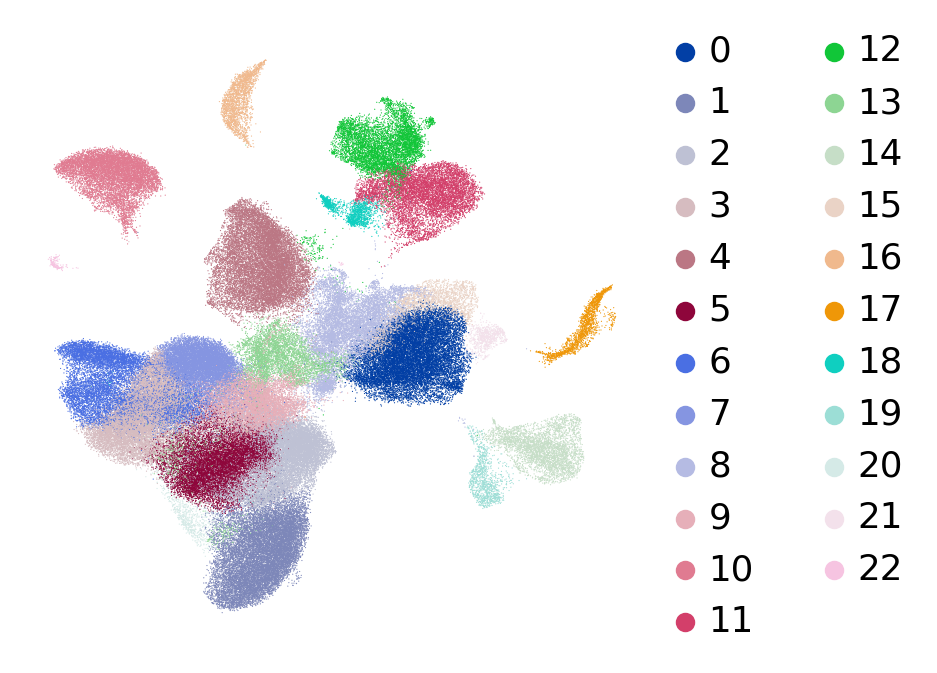

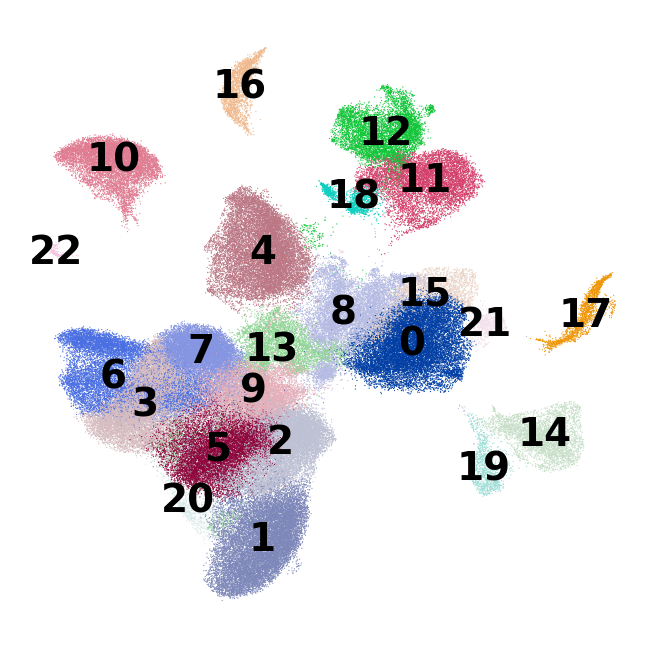

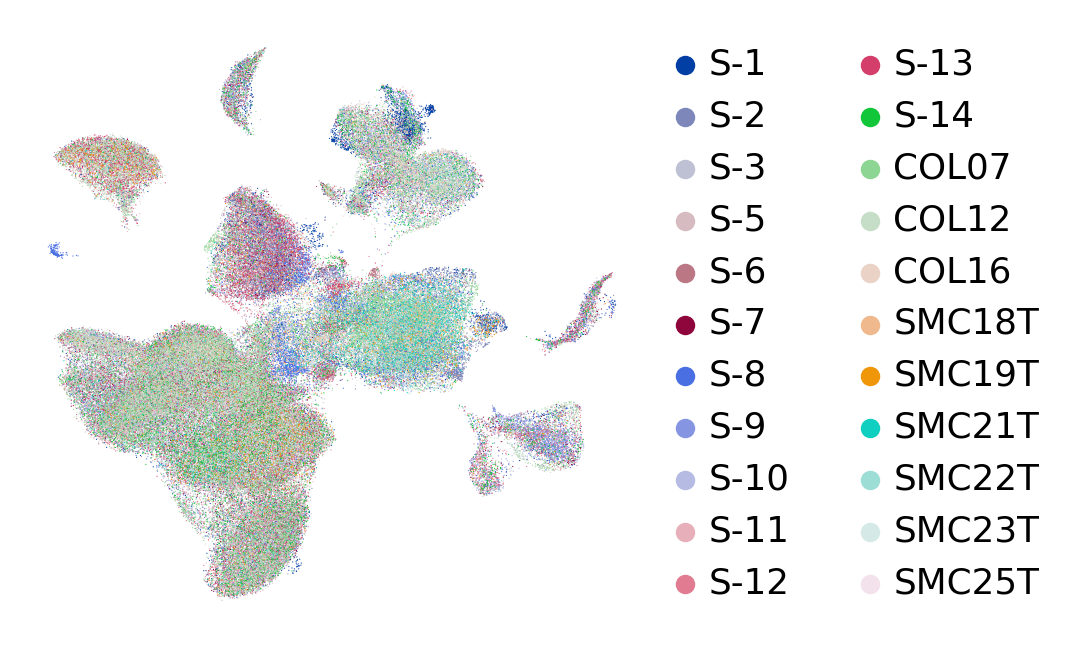

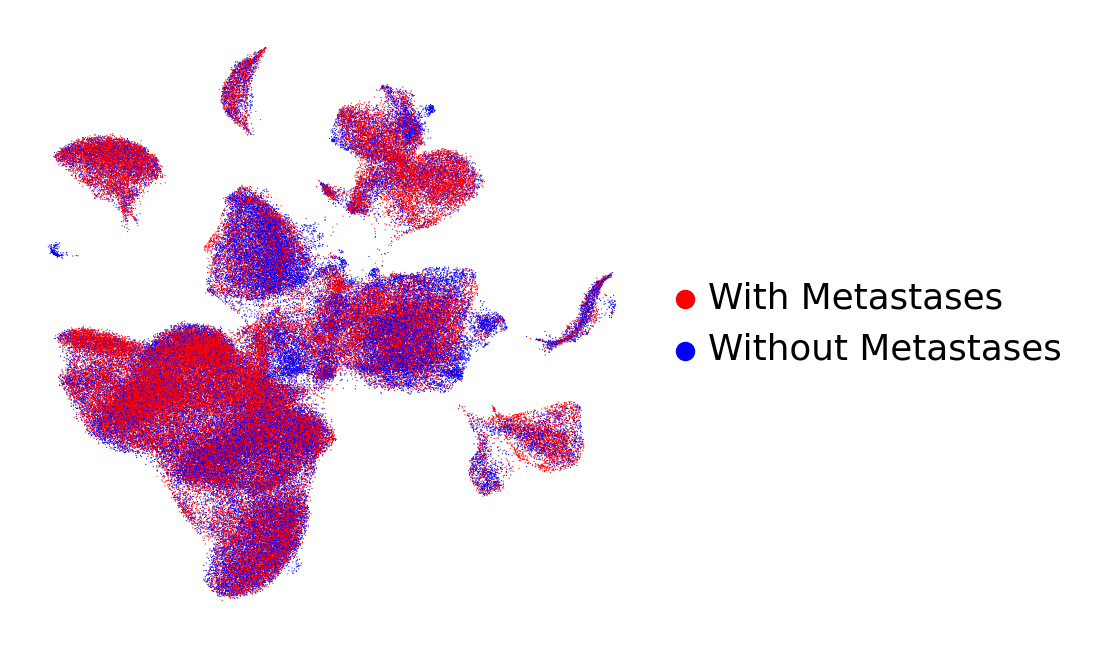

In [5]:
sc.pl.umap(adata, color=['leiden'], legend_loc='right margin', frameon=False, title='', use_raw=True, )
sc.pl.umap(adata, color=['leiden'], legend_loc='on data', frameon=False, title='', use_raw=True,save='all_leiden.pdf')
sc.pl.umap(adata, color=['batch'], legend_loc='right margin', frameon=False, title='', use_raw=True, save='all_batch.pdf')
sc.pl.umap(adata, color=['Metastases'], legend_loc='right margin', frameon=False, title='', use_raw=True, palette={'Without Metastases': 'blue', 'With Metastases': 'red'}, save='all_meta.pdf')

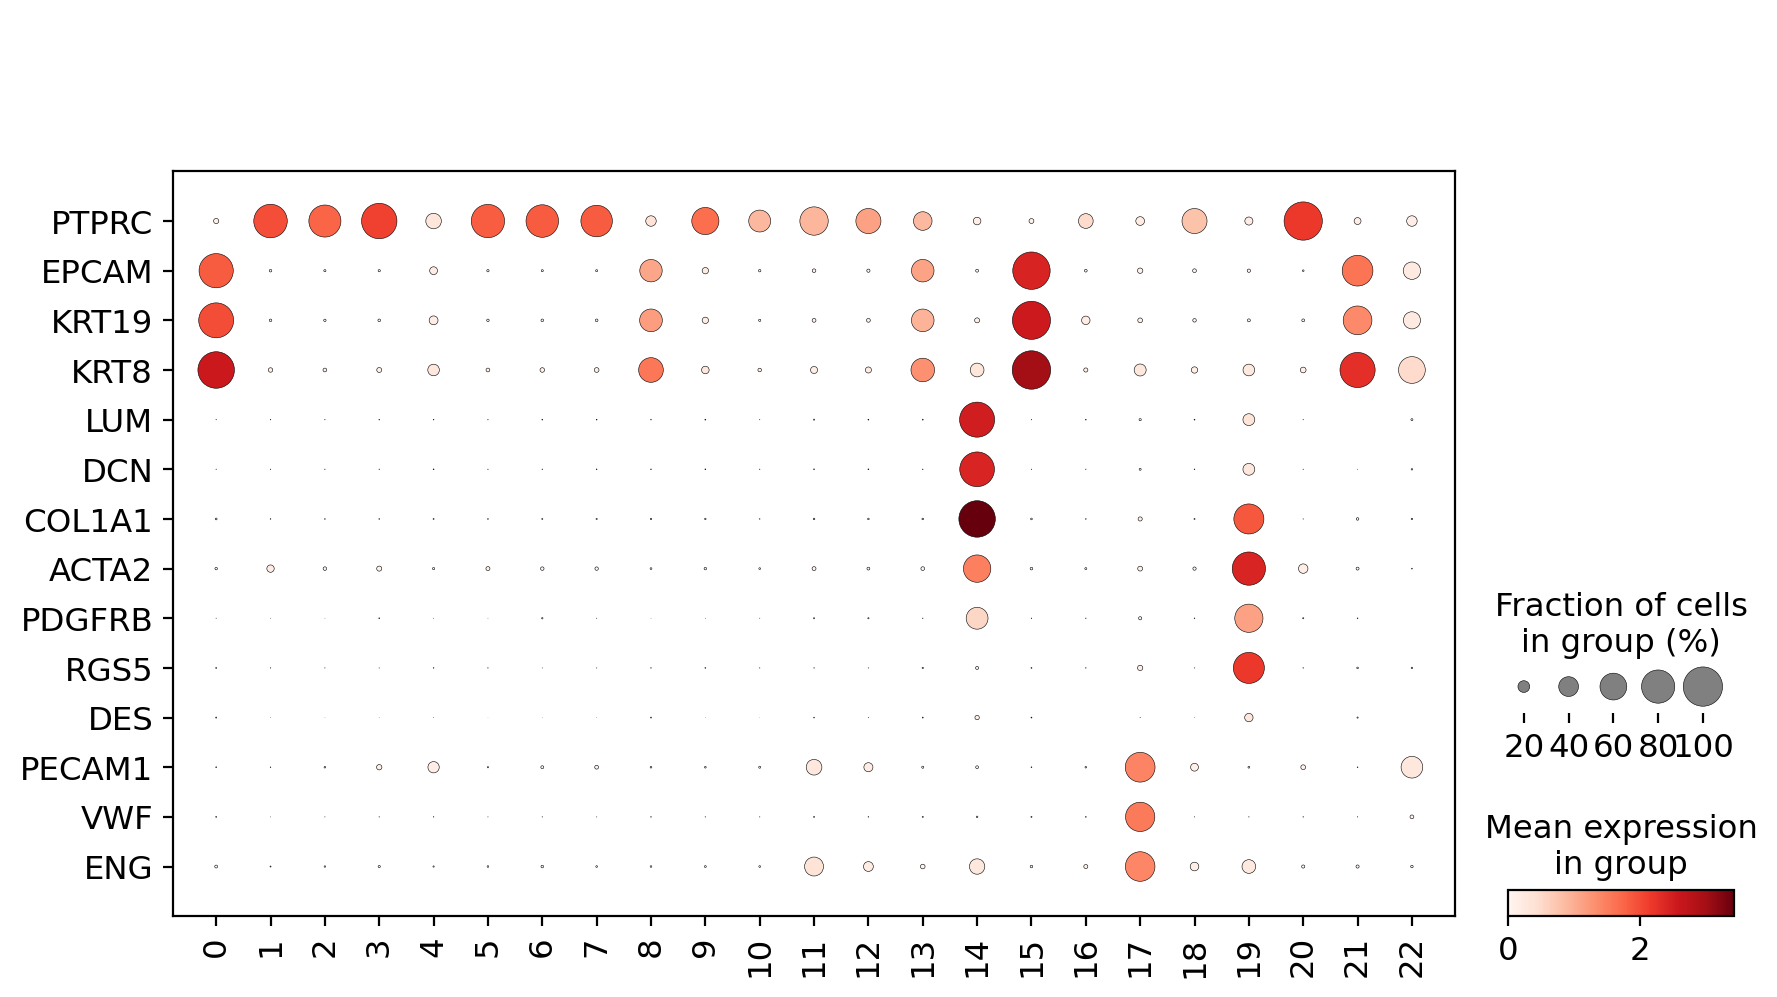

In [6]:
markers=['PTPRC','EPCAM','KRT19','KRT8','LUM','DCN','COL1A1','ACTA2','PDGFRB','RGS5','DES','PECAM1', 'VWF','ENG']
sc.pl.dotplot(adata, var_names=markers, groupby='leiden', use_raw=True, var_group_rotation=0, vmin=0, swap_axes=True, dot_min=0,save='allmarker.pdf')

In [7]:
flatten = lambda nest_list: sum(([x] if not isinstance(x, list) else flatten(x) for x in nest_list), [])
def label_helper(number_of_cluster: int):
  _s1 = ",\n".join([str(i) for i in range(number_of_cluster+1)])
  _s2 = "\nnew_cluster_names ='''\n" + _s1 + ",\n'''\n"
  print(_s2)
def labeled(
  adata: sc.AnnData, 
  cluster_names: str, 
  reference_key: str, 
  cell_type_key: str = 'CellType', 
  inplace: bool = True
  ):
  _adata = adata if inplace else adata.copy()
  _ref_df = _adata.obs.loc[:, [reference_key]]
  _annot_df = pd.read_csv(StringIO(cluster_names), header=None, dtype='object')
  _adata.obs[cell_type_key] = pd.merge(
    _ref_df, _annot_df, left_on=reference_key, right_on=0, how='left')[1].values
  return None if inplace else _adata

In [8]:
label_helper(22)
new_cluster_names ='''
0,Epi
1,
2,
3,
4,
5,
6,
7,
8,Epi
9,
10,
11,
12,
13,Epi
14,Fibro
15,Epi
16,
17,Endo
18,
19,Fibro
20,
21,Epi
22,Epi
'''


new_cluster_names ='''
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
'''



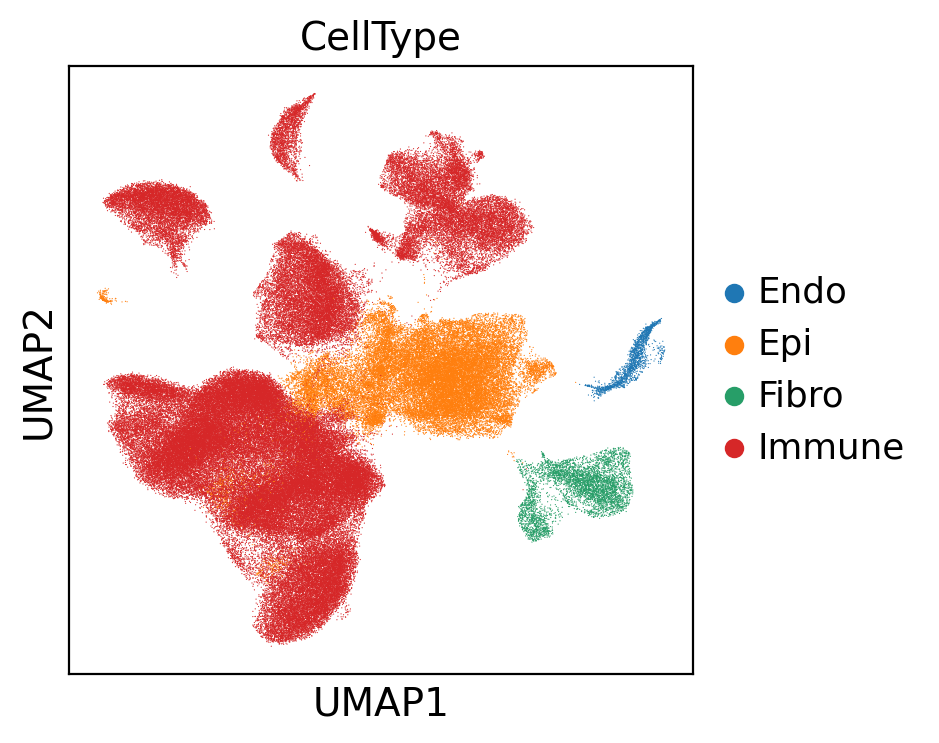

In [9]:
from io import StringIO
labeled(adata,cluster_names=new_cluster_names,reference_key='leiden',cell_type_key='CellType')
adata.obs.CellType.fillna('Immune',inplace=True)
sc.pl.umap(adata,color='CellType',save='celltype.pdf')